In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import math

In [5]:
def f(r):
    return np.cos(r)

def g(r):
    return np.exp(-r**2)    

def norm_gaussian(d=2, sigma=1.0):
    return np.sqrt((2.0*np.pi*sigma**2)**d)

def metropolis_hastings_D(f, N=100000, delta=1.0, d=2):
    x = np.zeros((N, d))
    for i in range(1,N):
        x[i,:] = x[i-1,:] + (np.random.random(d)-0.5)*delta

        future = f(np.sqrt(np.sum(x[i,:]**2)))
        present = f(np.sqrt(np.sum(x[i-1,:]**2)))

        r = np.minimum(1.0, future/present)
        g = np.random.random()

        if g < r:
            x[i,:] = x[i,:]
        else:
            x[i,:] = x[i-1,:]
    return x

def mc_integral_D(f, g, d=2):
    x = metropolis_hastings_D(g, d=d)    
    r = np.sqrt(np.sum(x*x, axis=1))
    average = np.average(f(r)) 
    norm = norm_gaussian(d=d, sigma = 1/np.sqrt(2))
    plt.plot(x[:,0], x[:,1])
    #plt.savefig('cadena2 dimensiones.pdf')
    return average * norm

1.8121034586158393


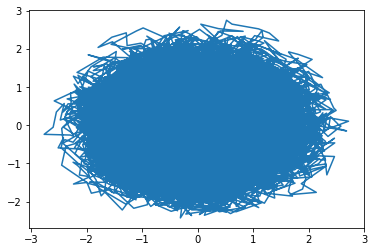

In [6]:
d=2
print(mc_integral_D(f, g, d=d))

2.136585104854613


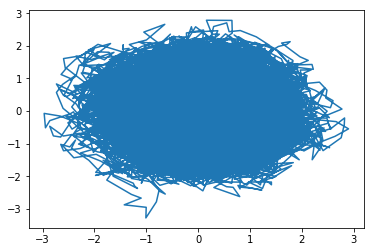

In [7]:
d=3
print(mc_integral_D(f, g, d=d))